# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [74]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [76]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [77]:
# Create a Beautiful Soup Object
marsPage = browser.html
scraper = BeautifulSoup(marsPage, 'html.parser')

In [78]:
# Extract all rows of data
tableRows = scraper.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [79]:
# Create an empty list
dfRows = []

# Loop through the scraped data to create a list of rows
for row in tableRows:
    # Extract all cell values of the row
    contents = row.find_all('td')
    
    rowData = []
    # Store all cell data in a new row
    rowData.append(contents[0].text.strip())
    rowData.append(contents[1].text.strip())
    rowData.append(contents[2].text.strip())
    rowData.append(contents[3].text.strip())
    rowData.append(contents[4].text.strip())
    rowData.append(contents[5].text.strip())
    rowData.append(contents[6].text.strip())
    
    # Add the dictionary to the list
    dfRows.append(rowData)

In [80]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(dfRows, columns=['ID', 'Earth Date', 'Sols', 'Solar Long', 'Month', 'Min Temp', 'Pressure'])

In [81]:
# Confirm DataFrame was created successfully
mars_df.head()

,ID,Earth Date,Sols,Solar Long,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [82]:
# Examine data type of each column
mars_df.dtypes

ID            object
Earth Date    object
Sols          object
Solar Long    object
Month         object
Min Temp      object
Pressure      object
dtype: object

In [83]:
# Change data types for data analysis
mars_df["Earth Date"] = pd.to_datetime(mars_df["Earth Date"])
mars_df = mars_df.astype({"Sols": "int32", "Solar Long": "int32", "Month": "int32", "Min Temp": "float64", "Pressure": "float64"})

In [84]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

ID                    object
Earth Date    datetime64[ns]
Sols                   int32
Solar Long             int32
Month                  int32
Min Temp             float64
Pressure             float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [85]:
# 1. How many months are there on Mars?
len(mars_df["Month"].unique())

12

In [86]:
# 2. How many sols (Martian days) worth of data are there?
len(mars_df["Sols"].unique())

1867

In [91]:
# 3. What is the average minimum temperature by month?
avgMinDF = mars_df[["Month", "Min Temp"]].groupby(["Month"]).mean()
avgMinDF

,Min Temp
Month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


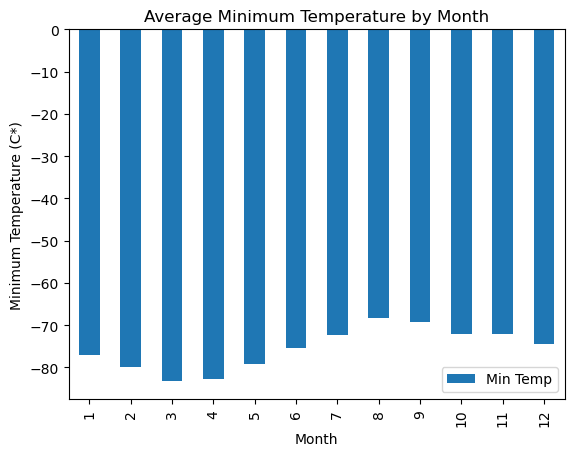

In [90]:
# Plot the average minimum temperature by month
tempGraph = avgMinDF.plot(kind="bar", title="Average Minimum Temperature by Month", ylabel="Minimum Temperature (C*)")
plt.show()

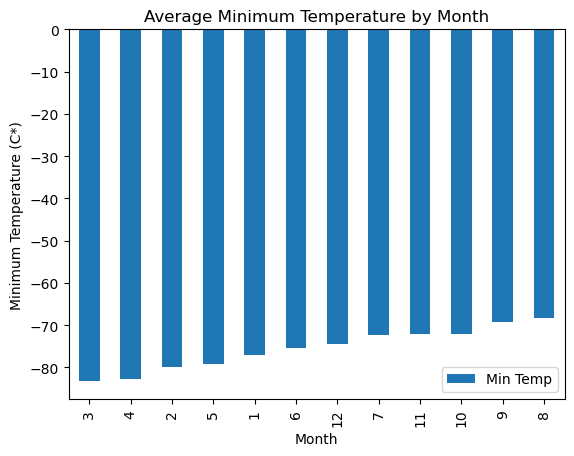

In [92]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sort_df = avgMinDF.sort_values("Min Temp", ascending=True)
tempGraph = sort_df.plot(kind="bar", title="Average Minimum Temperature by Month", ylabel="Minimum Temperature (C*)")
plt.show()

In [93]:
# 4. What is the average pressure by month?
pressureDF = mars_df[["Month", "Pressure"]].groupby(["Month"]).mean()
pressureDF

,Pressure
Month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


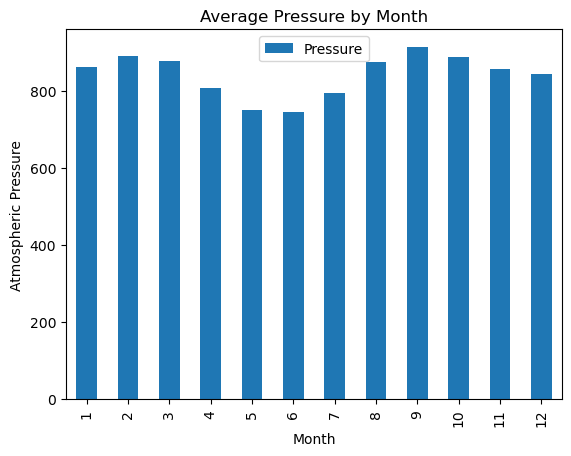

In [94]:
# Plot the average pressure by month
pressureGraph = pressureDF.plot(kind="bar", title="Average Pressure by Month", ylabel="Atmospheric Pressure")
plt.show()

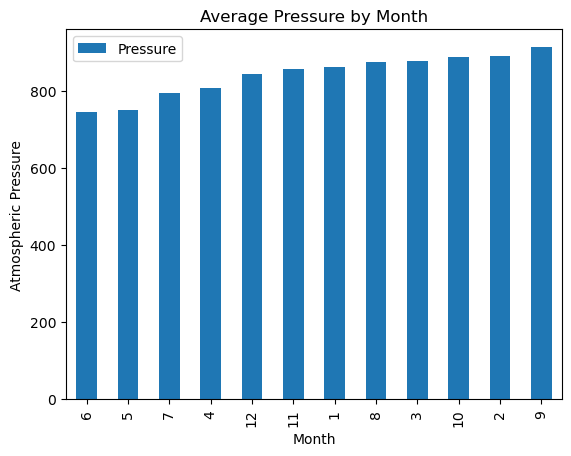

In [95]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sortPressure = pressureDF.sort_values("Pressure", ascending=True)
pressureGraph = sortPressure.plot(kind="bar", title="Average Pressure by Month", ylabel="Atmospheric Pressure")
plt.show()

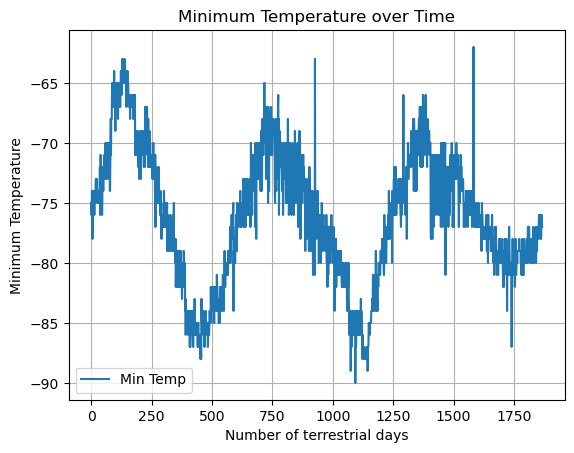

In [106]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
tempDaily = mars_df[["Min Temp"]].reset_index().rename(columns={"index": "Days_out"})
tempDaily.plot(kind="line", x="Days_out", y="Min Temp", grid=True, title="Minimum Temperature over Time", xlabel="Number of terrestrial days", ylabel="Minimum Temperature")
plt.show()

#### Minimum Temperature

On average, Martian months 3 and 4 had the lowest minimum temperatures at around -83 degrees Celsius, and Martian month 8 had the highest average miniumum temperatures at around -67 degrees Celsius.

#### Atmospheric Pressure

On average, Martian month 9 had the highest atmospheric pressure at around 900 units, and Martian month 6 had the lowest average atmospheric pressure at around 730 units.

#### Year Length

From a visual estimation of the above graph detailing the minimum temperature fluctuations across a period of thousands of days, the average Martian year lasts approximately 625 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [108]:
# Write the data to a CSV
mars_df.to_csv("Mars_Weather_Data", encoding="utf-8", index=True, header=True)

In [70]:
browser.quit()